# Superstore Sales & Customer Insights

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
df=pd.read_csv("superstore(in).csv",encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 21,Unnamed: 22
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0%,41.91,NaN,NaN
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,NaN,731.94,3,NaN,219.58,NaN,NaN
2,3,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,US,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,NaN,2,0%,6.87,NaN,NaN
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,45%,NaN,NaN,NaN
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,NaN,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,20%,2.52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,20%,4.10,NaN,NaN
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0%,15.63,NaN,NaN
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,20%,19.39,NaN,NaN
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0%,13.32,NaN,NaN


In [2]:
df.shape

(9994, 23)

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

## Drop Two Unnamed Column

In [4]:
df.drop(columns=['Unnamed: 21', 'Unnamed: 22'],inplace=True)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## check data types 

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount          object
Profit           float64
dtype: object

## convert into valid data types

In [7]:
df['Order Date']=pd.to_datetime(df['Order Date'])   
df['Ship Date']=pd.to_datetime(df['Ship Date']) 

In [8]:
df['Discount'] = df['Discount'].astype(str).str.replace("%", "",regex=False)
df['Discount'] = pd.to_numeric(df['Discount'],errors='coerce')

## Convert discount into percentage

In [9]:
df['Discount']=df['Discount']/100

In [10]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## Check for null values

In [11]:
df.isnull().sum()

Row ID             0
Order ID          31
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name     37
Segment            0
Country            0
City              47
State              0
Postal Code        0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name      83
Sales             45
Quantity           0
Discount          45
Profit           104
dtype: int64

## Order ID (Drop rows)

In [12]:
df=df.dropna(subset=['Order ID'])

## Customer Name Cannot Be Filled or Guessed so drop it.

In [13]:
df=df.dropna(subset=['Customer Name'])

In [14]:
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [15]:
df['Product Name']=df['Product Name'].fillna("Unknown")
df['Product Name'].isnull().sum()

0

## Missing Sales means the order is incomplete → analysis becomes wrong.
## So drop:

In [16]:
df=df.dropna(subset=['Sales'])
df['Sales'].isnull().sum()

0

In [17]:
df['Discount']=df['Discount'].fillna(0)
df['Discount'].isnull().sum()

0

## Profit is a derived value → cannot be filled statistically so drop it.

In [18]:
df=df.dropna(subset=['Profit'])
df['Profit'].isnull().sum()

0

## All Null values were removed and filled.

In [19]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [20]:
df.shape

(9786, 21)

In [21]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [22]:
df['Country'].unique()

array(['United States', 'US'], dtype=object)

In [23]:
df['Country']=df['Country'].str.replace('US','United States')
df['Country'].unique()

array(['United States'], dtype=object)

In [24]:
df['State'].unique()

array(['Kentucky', 'Florida', 'California', 'North Carolina',
       'Washington', 'Texas', 'Utah', 'Nebraska', 'Pennsylvania',
       'Illinois', 'Minnesota', 'Michigan', 'Delaware', 'Indiana',
       'New York', 'Arizona', 'Virginia', 'Tennessee', 'Alabama',
       'Oregon', 'Colorado', 'Iowa', 'Ohio', 'Missouri', 'Wisconsin',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey',
       'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'South Carolina',
       'New Hampshire', 'Maryland', 'District of Columbia', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 'West Virginia'], dtype=object)

In [25]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [26]:
df['Category'].unique()

array(['Furniture', 'Office   Supplies', '  Technology', 'Technology',
       'Office  Supplies', 'Office Supplies', '  Office Supplies',
       ' Furniture', ' Technology', '  Furniture'], dtype=object)

In [27]:
df['Category']=df['Category'].str.strip()
df['Category']=df['Category'].replace('\s+',' ',regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aksha\AppData\Local\Temp\ipykernel_27332\34696852.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['Category']=df['Category'].replace('\s+',' ',regex=True)


In [28]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [29]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Storage', 'Furnishings', 'Phones',
       'Binders', 'Tables', 'Paper', 'Art', 'Appliances', 'Accessories',
       'Envelopes', 'Labels', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [30]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Check for Duplicates

In [31]:
df['Order ID'].duplicated().sum()

4824

In [32]:
df[df['Order ID'].duplicated(keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,Unknown,731.94,3,0.0,219.58
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Unknown,48.86,7,0.0,14.17
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.15,6,0.2,90.72
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3,0.2,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.99,1,0.0,28.80
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.10,5,0.0,55.65
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.0,15.63
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.2,19.39


### Order ID shows duplicates because each order can contain multiple products. These are not true duplicates, they represent line items within the same order. Therefore, they should not be removed.

In [33]:
df[df.duplicated(keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [34]:
df.duplicated().sum()

0

### Duplicate Check:
### No fully duplicated rows were found in the dataset (df.duplicated().sum() = 0).
### Although Order ID appears multiple times, this is expected because one order can contain multiple products. Therefore, these are not true duplicates and were not removed.

## Cleaned Data

In [35]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,Unknown,731.94,3,0.0,219.58
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,New York City,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.2,2.52


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9786 entries, 0 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9786 non-null   int64         
 1   Order ID       9786 non-null   object        
 2   Order Date     9786 non-null   datetime64[ns]
 3   Ship Date      9786 non-null   datetime64[ns]
 4   Ship Mode      9786 non-null   object        
 5   Customer ID    9786 non-null   object        
 6   Customer Name  9786 non-null   object        
 7   Segment        9786 non-null   object        
 8   Country        9786 non-null   object        
 9   City           9786 non-null   object        
 10  State          9786 non-null   object        
 11  Postal Code    9786 non-null   int64         
 12  Region         9786 non-null   object        
 13  Product ID     9786 non-null   object        
 14  Category       9786 non-null   object        
 15  Sub-Category   9786 non-nu

In [37]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9786.000000,9786.000000,9786.000000,9786.000000
mean,228.507910,3.789291,0.153930,29.753823
std,620.326005,2.225543,0.205142,233.759135
min,0.440000,1.000000,0.000000,-6599.980000
25%,17.280000,2.000000,0.000000,1.810000
50%,54.375000,3.000000,0.200000,8.730000
75%,209.002500,5.000000,0.200000,29.697500
max,22638.480000,14.000000,0.800000,8399.980000


In [38]:
Total_Orders=df['Order ID'].nunique()
Total_Customers=df['Customer ID'].nunique()
print("Total_Customers:",Total_Customers)
print("Total_Orders:",Total_Orders)

Total_Customers: 793
Total_Orders: 4962


## EDA

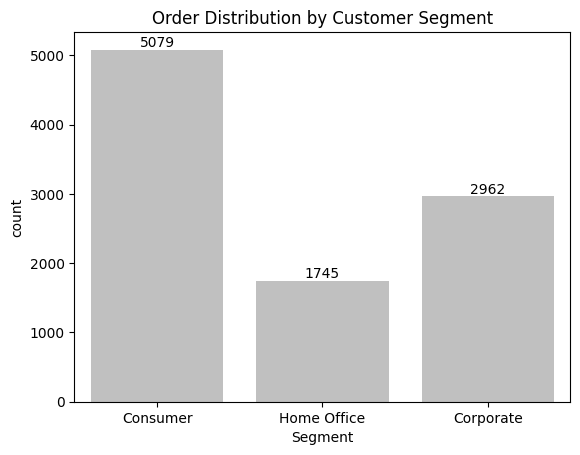

In [39]:
ax=sns.countplot(x='Segment',data=df,color='silver')
ax.bar_label(ax.containers[0])
plt.title("Order Distribution by Customer Segment")
plt.show()

### The Consumer segment contributes the highest number of orders showing it is the primary customer base for the business.

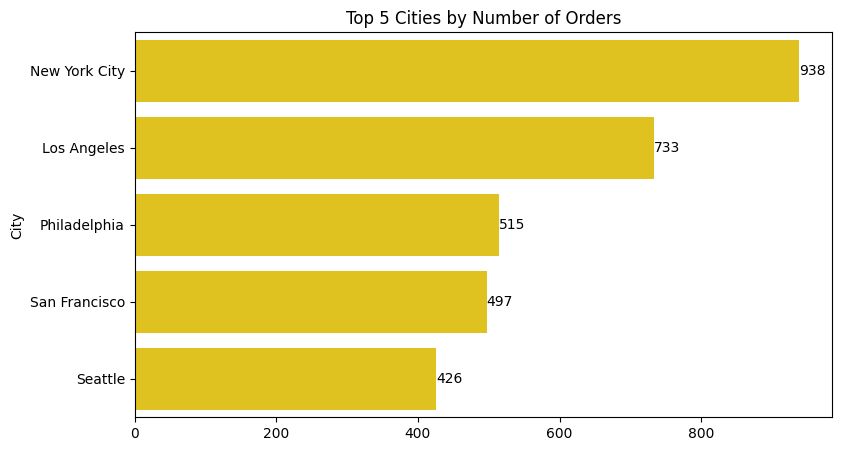

In [40]:
gb=df.groupby('City')['Order ID'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(9,5))
ax=sns.barplot(y=gb.index,x=gb.values,color='gold')
ax.bar_label(ax.containers[0])
plt.title("Top 5 Cities by Number of Orders")
plt.show()

### New York City leads with the highest number of orders, indicating it is the strongest demand hub for the business.
### Overall, big cities have more customer demand, and New York clearly leads all other cities.

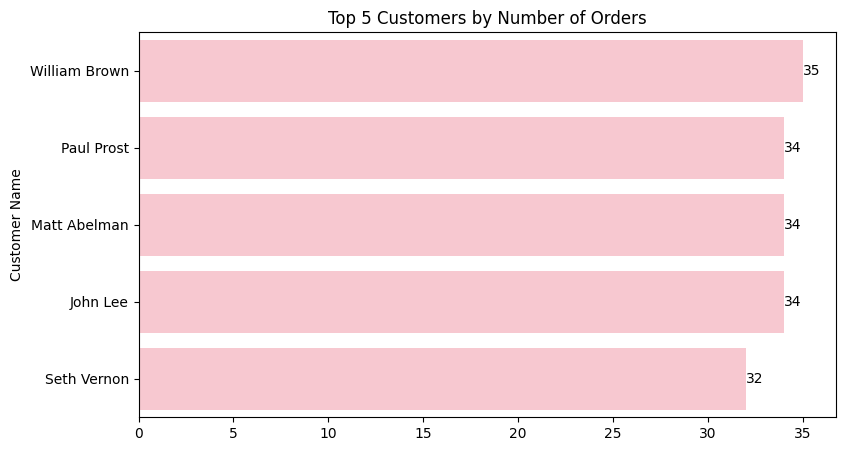

In [41]:
gb=df.groupby('Customer Name')['Order ID'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(9,5))
ax=sns.barplot(y=gb.index,x=gb.values,color='pink')
ax.bar_label(ax.containers[0])
plt.title("Top 5 Customers by Number of Orders")
plt.show()	

### William Brown placed the highest number of orders, closely followed by Paul Prost, Matt Abelman, and John Lee.

### The top customers show consistent repeat purchasing behavior, indicating strong customer loyalty and potential high lifetime value.

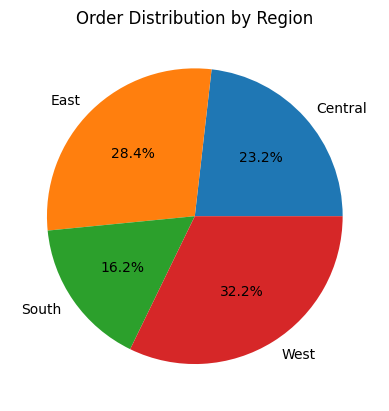

In [42]:
gb=df.groupby('Region')['Order ID'].count()
plt.pie(gb,labels=gb.index,autopct="%1.1f%%")
plt.title("Order Distribution by Region")
plt.show()

### The West region contributes the highest share of orders (about 32%), indicating strong customer demand.
### The South region has the lowest order share, suggesting lower sales activity compared to other regions.

In [43]:
df['Days']=(df['Ship Date']-df['Order Date']).dt.days

## Average Delivery Time by Shipping Mode

In [44]:
gb=df.groupby('Ship Mode')['Days'].mean()
gb

Ship Mode
First Class       2.188629
Same Day          0.044944
Second Class      3.236316
Standard Class    5.009390
Name: Days, dtype: float64

In [45]:
gb = df.groupby('Ship Mode').agg(
    AvgDays=('Days', 'mean'),
    TotalOrders=('Order ID', 'count')
).reset_index()


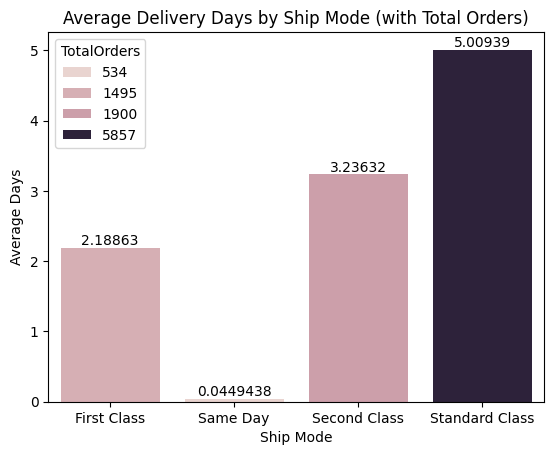

In [46]:
gb=df.groupby('Ship Mode').agg(avgdays=('Days','mean'),TotalOrders=('Order ID','count')).reset_index()
ax=sns.barplot(x='Ship Mode',y='avgdays',hue='TotalOrders',data=gb)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title("Average Delivery Days by Ship Mode (with Total Orders)")
plt.xlabel("Ship Mode")
plt.ylabel("Average Days")
plt.show()

### Standard Class takes the longest time, but most people still choose it because it’s the most used shipping mode.
### Same Day delivery is the fastest, but very few customers use it.

In [47]:
df['Product Name'].unique()

array(['Bush Somerset Collection Bookcase', 'Unknown',
       "Eldon Fold 'N Roll Cart System", ...,
       'RCA ViSYS 25425RE1 Corded phone', 'Eureka Hand Vacuum, Bagless',
       'Eldon Jumbo ProFile Portable File Boxes Graphite/Black'],
      dtype=object)

C:\Users\aksha\AppData\Local\Temp\ipykernel_27332\51397076.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


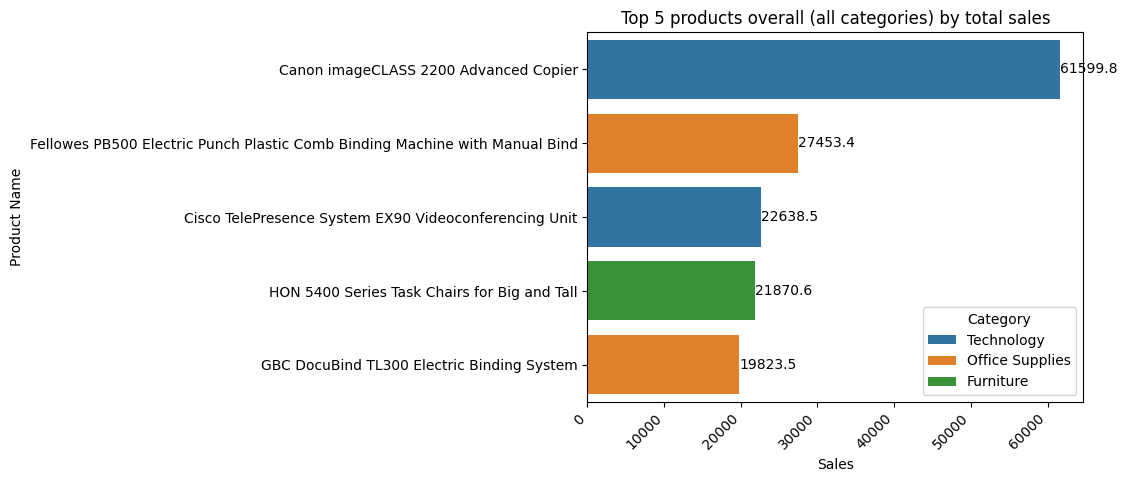

In [48]:
gb=df.groupby(['Product Name','Category'])['Sales'].sum().sort_values(ascending=False).head(5).reset_index()
ax=sns.barplot(y='Product Name',x='Sales',hue='Category',data=gb)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation=45, ha='right')
plt.title("Top 5 products overall (all categories) by total sales")
plt.tight_layout()
plt.show()

### Technology products generated the highest sales, especially the Canon copier, which is the top performer.
### Office Supplies also contributed strongly, with two products appearing in the top five.
### Only one Furniture item made it to the list, showing lower overall sales compared to the other categories.

In [49]:
df['Year']=df['Order Date'].dt.year

In [50]:
df['Year'].unique()

array([2016, 2015, 2014, 2017])

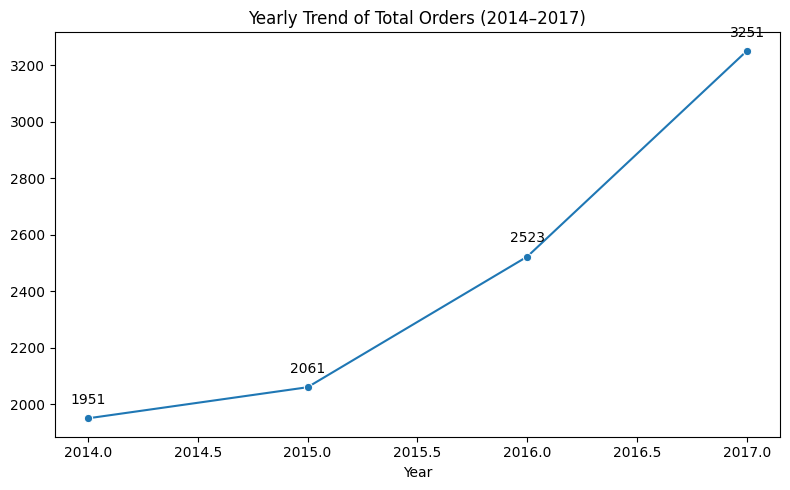

In [71]:
gb=df.groupby('Year')['Order ID'].count()
plt.figure(figsize=(8,5))
sns.lineplot(x=gb.index,y=gb.values,marker='o')
for x, y in zip(gb.index, gb.values):
    plt.text(x, y + 50, str(y), ha='center')
plt.title("Yearly Trend of Total Orders (2014–2017)")
plt.tight_layout()
plt.show()

### Order volume increased every year, showing consistent business growth from 2014 to 2017.
### The biggest jump happened between 2016 and 2017, where orders rose sharply.
### This trend indicates higher customer activity and stronger sales performance over the years.

In [52]:
df['Month']=df['Order Date'].dt.month_name()

C:\Users\aksha\AppData\Local\Temp\ipykernel_27332\3464410836.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb = df.groupby('Month')['Order ID'].count()


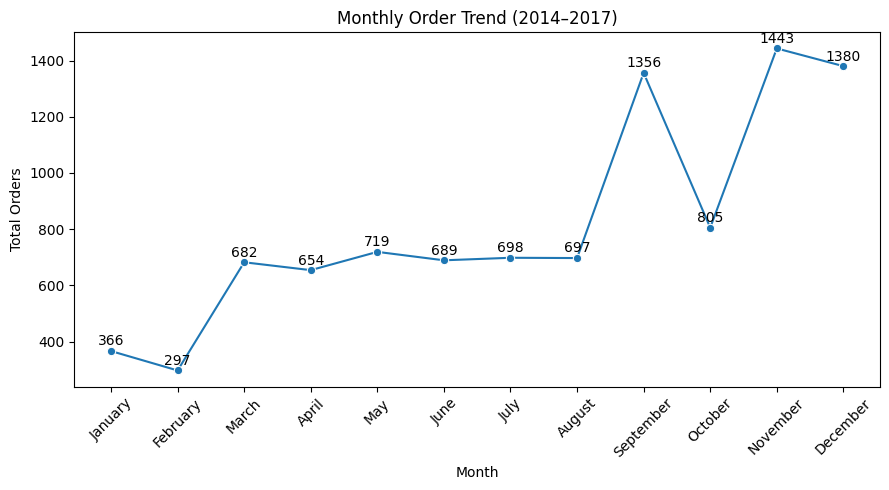

In [53]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
gb = df.groupby('Month')['Order ID'].count()
plt.figure(figsize=(9,5))
sns.lineplot(x=gb.index, y=gb.values, marker='o')
for x, y in zip(gb.index, gb.values):
    plt.text(x, y + 20, str(y), ha='center')

plt.title("Monthly Order Trend (2014–2017)")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### November and December recorded the highest number of orders, likely due to year-end & holiday season demand.
### February has the lowest order volume, showing a clear dip after the New Year period
### Order volume gradually increases from March to June, indicating mid-year growth.
### Overall, the trend shows consistent seasonality, with peaks during festive and year-end months.

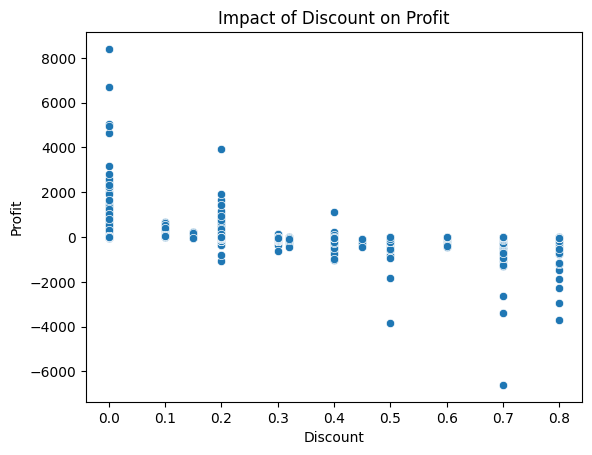

In [54]:
sns.scatterplot(x='Discount',y='Profit',data=df)
plt.title("Impact of Discount on Profit")
plt.show()

### Higher discount levels clearly reduce profitability, showing a strong negative relationship.
### Orders without discount generate the maximum profit, suggesting that heavy discount strategies are hurting revenue.

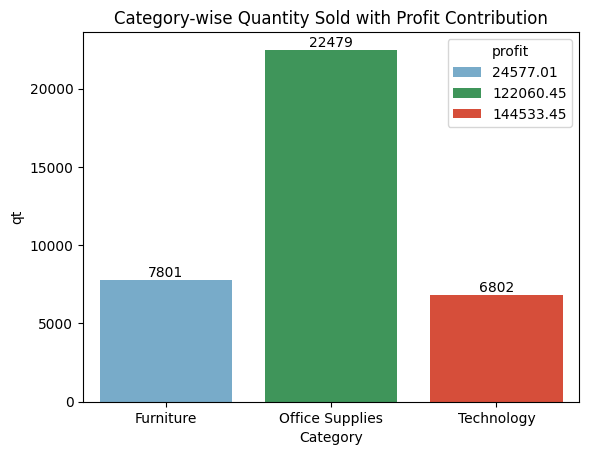

In [55]:
gb=df.groupby('Category').agg(qt=('Quantity','sum'),profit=('Profit','sum')).reset_index()
palette = ["#6BAED6","#31A354", "#F03B20"]

ax=sns.barplot(x='Category',y='qt',hue='profit',data=gb,palette=palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Category-wise Quantity Sold with Profit Contribution")
plt.show()

### Office Supplies has the highest quantity sold
### It clearly indicates Office Supplies is the most demanded category.
### Furniture and Technology have similar demand
### High sales quantity does NOT mean high profit
### Despite selling less quantity, Technology generates the highest profit.
### Office Supplies sells the most, but Technology is more profitable per unit.

## check if negative values is present or not..

In [56]:
(df['Sales']<0).any()

False

In [57]:
(df['Profit']<0).any()

True

In [58]:
df_negative = df[df['Profit'] < 0]
df_negative

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Year,Month
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.54,3,0.80,-3.82,4,2015,November
28,29,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.62,2,0.70,-7.05,4,2015,September
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.92,5,0.60,-147.96,2,2016,December
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.40,3,0.32,-46.98,4,2015,December
39,40,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.06,3,0.30,-15.15,4,2015,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.39,7,0.80,-35.82,4,2016,March
9921,9922,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,Office Supplies,Binders,Acco Expandable Hanging Binders,5.74,3,0.70,-4.59,6,2014,November
9931,9932,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.33,4,0.15,-40.20,4,2015,November
9937,9938,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.09,2,0.20,-1.78,3,2016,June


In [66]:
df_negative.groupby('Category')['Profit'].sum().sort_values()

Category
Office Supplies   -55183.73
Furniture         -54115.96
Technology        -35564.84
Name: Profit, dtype: float64

### Office Supplies is the highest loss-making category (-55K), mainly due to low-margin items sold with high discounts.
### Furniture shows significant losses (-54,115.96)
### Technology has the lowest loss (-35K), indicating stronger margins and controlled discounting.

In [68]:
df.to_excel("Superstore_data.xlsx", index=False)

In [70]:
df.shape

(9786, 24)